<a href="https://colab.research.google.com/github/Yanaput/EGCI463-pattern-recognition-project/blob/main/nsynth_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://huggingface.co/datasets/TwinkStart/Nsynth

In [ ]:
import numpy as np
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install librosa keras tensorflow

In [ ]:
from google.colab import userdata
projPath  = userdata.get('driveProjDir') #replace this with your csv path

In [ ]:
features_label = pd.read_csv(f"/content/drive/MyDrive/{projPath}/features_label.csv")

In [ ]:
features_label

,0,1,2,3,4,5,6,7,8,9,...,12023,12024,12025,12026,12027,12028,12029,12030,12031,instrument_family
0,-53.803909,-57.194024,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,3
1,-41.581627,-41.147030,-50.666237,-64.943981,-60.756839,-60.464744,-60.993004,-63.912845,-61.711862,-62.382845,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,6
2,-16.751124,-14.606224,-14.500415,-14.003709,-14.280511,-14.614283,-15.854235,-16.143106,-17.500415,-20.172544,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-74.445993,0
3,-2.217868,0.000000,-2.265561,-4.262692,-5.280903,-6.297461,-7.342139,-8.409485,-9.516589,-10.664447,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,0
4,-39.486546,-30.101491,-29.918419,-34.714702,-49.770357,-55.999469,-55.860402,-53.477410,-59.263462,-60.489511,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,-22.894519,-21.310778,-27.454087,-33.497683,-33.068524,-32.833817,-32.720519,-32.592567,-32.394799,-32.219643,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,4
4092,-50.416488,-42.023727,-39.495096,-41.555525,-51.454520,-54.918152,-60.328524,-69.375597,-73.076184,-73.600458,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,0
4093,-22.917634,-27.114879,-52.179479,-67.841889,-68.402644,-65.043253,-62.685682,-72.406796,-67.885038,-63.723752,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,5
4094,-68.290314,-59.045592,-54.324949,-57.203160,-57.954304,-56.753415,-57.259861,-60.041177,-60.289779,-60.373389,...,-80.0,-80.0,-80.0,-78.91858,-80.0,-80.0,-80.0,-80.0,-63.326588,9


# Model training with traditional way

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_label.iloc[:, :-1], features_label.iloc[:,-1], test_size=0.2, random_state=3213123)

In [ ]:
lr = LogisticRegression(max_iter=20000)

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=20000)

In [ ]:
pred = lr.predict(x_test)

In [ ]:
pred

array([4, 1, 3, 6, 0, 1, 0, 8, 6, 3, 4, 6, 4, 9, 9, 3, 3, 0, 0, 0, 6, 1,
       2, 4, 1, 0, 8, 6, 0, 8, 6, 9, 3, 5, 9, 4, 1, 4, 3, 1, 0, 4, 0, 0,
       7, 0, 4, 3, 3, 1, 0, 6, 4, 3, 4, 6, 0, 6, 4, 2, 9, 0, 4, 0, 6, 4,
       0, 3, 3, 0, 0, 3, 0, 6, 3, 0, 1, 1, 2, 3, 4, 0, 6, 0, 0, 8, 3, 4,
       0, 0, 6, 0, 3, 8, 0, 0, 8, 4, 3, 2, 3, 6, 3, 5, 4, 3, 1, 4, 8, 0,
       6, 2, 0, 6, 4, 7, 3, 0, 1, 3, 4, 4, 8, 7, 5, 0, 2, 0, 4, 9, 8, 8,
       6, 4, 0, 0, 4, 7, 3, 0, 4, 0, 4, 2, 3, 1, 4, 4, 9, 3, 4, 7, 8, 3,
       3, 4, 1, 0, 4, 0, 3, 2, 4, 4, 0, 0, 8, 4, 6, 5, 4, 4, 3, 2, 8, 3,
       3, 0, 4, 3, 4, 0, 0, 2, 8, 3, 3, 4, 6, 3, 6, 4, 6, 7, 4, 2, 5, 0,
       6, 4, 4, 8, 0, 3, 4, 4, 3, 4, 3, 7, 8, 0, 8, 0, 4, 3, 0, 0, 1, 3,
       0, 3, 0, 6, 4, 4, 4, 4, 0, 3, 0, 3, 6, 3, 3, 0, 4, 7, 1, 0, 4, 3,
       4, 1, 4, 7, 0, 0, 0, 0, 6, 0, 0, 3, 7, 6, 0, 5, 1, 4, 4, 4, 7, 3,
       5, 0, 1, 0, 0, 6, 8, 6, 9, 6, 9, 0, 3, 6, 5, 6, 8, 4, 9, 3, 9, 3,
       0, 4, 6, 3, 0, 4, 0, 2, 0, 0, 3, 0, 4, 3, 4,

In [ ]:
lr.score(x_test, y_test)

0.8719512195121951

In [ ]:
np.shape(y_test)

(820,)

In [ ]:
np.shape(pred)

(820,)

In [ ]:
lr.classes_
# no instrument Synth Lead in the test set of this Nsynth dataset

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

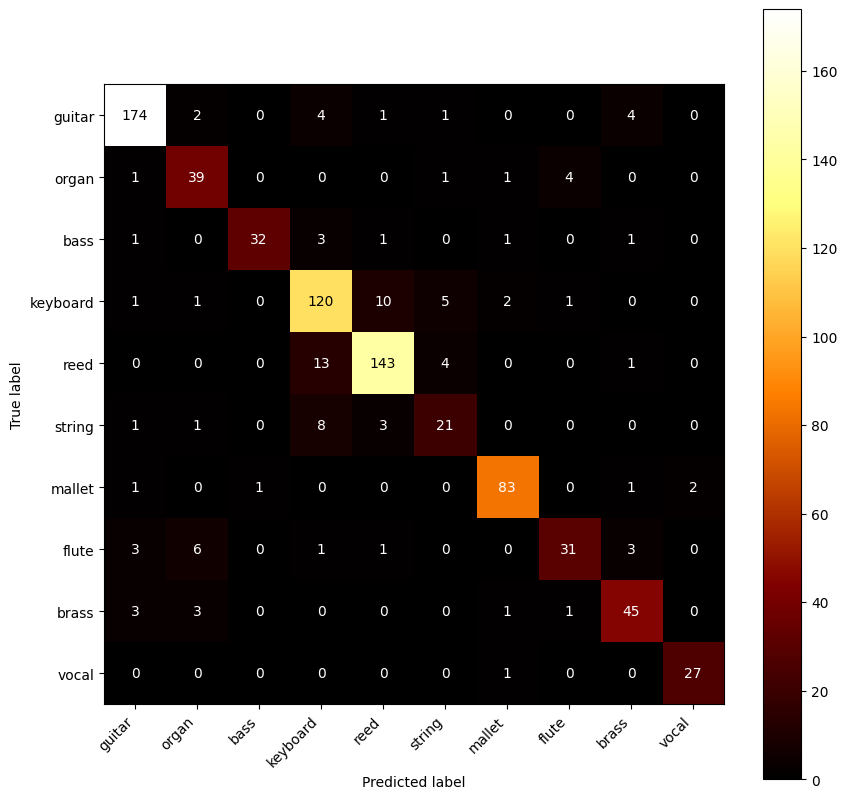

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_list)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.plot(ax=ax, cmap="afmhot")
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
f1_score(y_test, pred, average='macro')

0.845802853313087

# Deeplearning model test

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [ ]:
x_train_reshaped = x_train.values.reshape(-1, 128, 94, 1)
x_test_reshaped = x_test.values.reshape(-1, 128, 94, 1)

In [ ]:
np.shape(x_train_reshaped)

(3276, 128, 94, 1)

In [ ]:
class_list

['guitar',
 'organ',
 'bass',
 'keyboard',
 'reed',
 'string',
 'mallet',
 'flute',
 'brass',
 'vocal']

In [ ]:
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
num_labels = len(class_list)
# one hot encoding using to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=num_labels)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=num_labels)

In [ ]:
input_shape = x_train_reshaped.shape[1:]

In [ ]:
model = models.Sequential([
    # Input layer
    Input(shape=(128, 94, 1)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Hidden Conv2D layer
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Hidden Conv2D layer
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 92, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 17920)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,293,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,387,850 (9.11 MB)

 Trainable params: 2,387,850 (9.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(
    filepath="best_model.keras",
    monitor="loss",            # Monitor the loss on training data
    save_best_only=True,       # Save only the best model
    mode="min",                # Lower loss is better
    verbose=1
)

# EarlyStopping: Stop training when loss stops improving
early_stopping = EarlyStopping(
    monitor="loss",            # Monitor the loss on training data
    patience=5,
    mode="min",                # Lower loss is better
    verbose=1
)


In [ ]:
history = model.fit(x_train_reshaped, y_train_encoded, epochs=50, batch_size=32,callbacks=[checkpoint, early_stopping])

Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 718ms/step - accuracy: 0.3914 - loss: 1.6657
Epoch 1: loss improved from inf to 1.64509, saving model to best_model.keras
103/103 ━━━━━━━━━━━━━━━━━━━━ 74s 719ms/step - accuracy: 0.3915 - loss: 1.6655
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.4368 - loss: 1.5213
Epoch 2: loss improved from 1.64509 to 1.48563, saving model to best_model.keras
103/103 ━━━━━━━━━━━━━━━━━━━━ 85s 752ms/step - accuracy: 0.4369 - loss: 1.5210
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 738ms/step - accuracy: 0.4703 - loss: 1.4078
Epoch 3: loss improved from 1.48563 to 1.37870, saving model to best_model.keras
103/103 ━━━━━━━━━━━━━━━━━━━━ 81s 739ms/step - accuracy: 0.4704 - loss: 1.4076
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 855ms/step - accuracy: 0.4965 - loss: 1.3150
Epoch 4: loss improved from 1.37870 to 1.30114, saving model to best_model.keras
103/103 ━━━━━━━━━━━━━━━━━━━━ 93s 856ms/step - accuracy: 0.4965 - loss: 1.3149
Epoch 5/50
103/1

In [ ]:
predictions  = model.predict(x_test_reshaped)

26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step


In [ ]:
predictions

array([[2.7679406e-16, 4.6485038e-13, 1.1173891e-17, ..., 4.8156588e-14,
        5.6088791e-20, 6.9249190e-31],
       [2.9538490e-24, 9.9999899e-01, 1.7979755e-11, ..., 1.0671048e-09,
        6.1916209e-27, 9.8507849e-07],
       [6.2125688e-04, 8.3675903e-17, 4.2826575e-17, ..., 8.4083727e-13,
        8.1433300e-14, 8.7003105e-19],
       ...,
       [3.8162744e-09, 5.5427658e-23, 4.7135823e-10, ..., 2.4659785e-21,
        1.2812860e-14, 6.6478902e-13],
       [2.1358900e-07, 2.4719561e-06, 9.9956113e-01, ..., 9.5953219e-08,
        5.3079190e-09, 1.9488469e-04],
       [1.7471933e-03, 1.0581990e-12, 3.8658507e-10, ..., 9.3304245e-12,
        1.2155019e-05, 2.8972799e-16]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([4, 1, 3, 7, 0, 1, 0, 8, 6, 3, 4, 6, 3, 9, 9, 6, 7, 0, 0, 0, 6, 1,
       6, 4, 7, 0, 8, 6, 0, 8, 6, 6, 3, 5, 9, 4, 1, 0, 3, 1, 0, 3, 0, 0,
       7, 0, 4, 3, 3, 1, 0, 6, 4, 3, 4, 6, 0, 6, 4, 2, 9, 0, 4, 0, 6, 0,
       0, 3, 3, 0, 0, 3, 8, 6, 3, 0, 1, 1, 2, 4, 4, 0, 6, 5, 0, 0, 3, 4,
       0, 0, 6, 0, 3, 8, 0, 0, 8, 4, 0, 2, 6, 6, 4, 5, 4, 3, 1, 4, 8, 0,
       6, 2, 0, 6, 4, 1, 3, 0, 1, 3, 3, 4, 8, 7, 1, 0, 2, 0, 4, 9, 8, 8,
       3, 4, 0, 0, 4, 7, 3, 0, 8, 0, 4, 2, 3, 1, 4, 4, 9, 3, 4, 7, 6, 3,
       3, 4, 3, 0, 4, 0, 3, 2, 4, 4, 0, 0, 8, 4, 6, 5, 4, 4, 3, 2, 8, 3,
       3, 0, 4, 3, 4, 0, 0, 2, 8, 4, 4, 4, 6, 4, 6, 4, 6, 7, 4, 2, 4, 0,
       1, 4, 4, 8, 0, 3, 4, 4, 3, 4, 3, 7, 8, 0, 8, 0, 4, 3, 0, 3, 1, 4,
       0, 3, 0, 6, 4, 4, 4, 4, 0, 3, 0, 3, 6, 3, 3, 0, 3, 7, 6, 0, 4, 3,
       4, 1, 4, 7, 0, 0, 0, 0, 6, 0, 0, 3, 7, 6, 0, 0, 1, 4, 4, 3, 7, 6,
       5, 0, 1, 0, 0, 6, 8, 6, 9, 6, 9, 0, 3, 6, 5, 6, 8, 4, 9, 3, 9, 0,
       0, 4, 6, 3, 0, 4, 0, 2, 0, 0, 3, 0, 4, 3, 4,

In [ ]:
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.9434 - loss: 0.1710
Test Loss: 0.18484315276145935
Test Accuracy: 0.9475609660148621


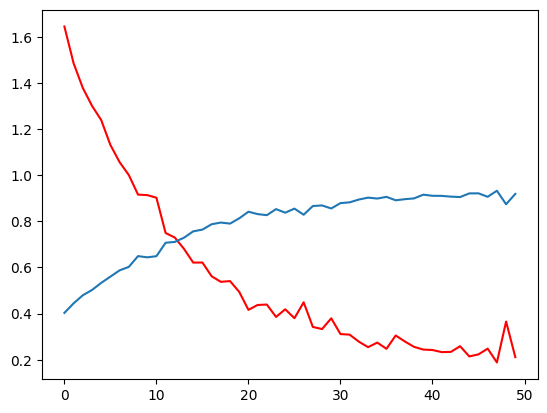

In [ ]:
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['accuracy'])

In [ ]:
history.history

{'accuracy': [0.40323564410209656,
  0.4444444477558136,
  0.47954821586608887,
  0.5024420022964478,
  0.5332722663879395,
  0.5604395866394043,
  0.5876068472862244,
  0.6025640964508057,
  0.6492673754692078,
  0.6440781354904175,
  0.648962140083313,
  0.7072649598121643,
  0.7109279632568359,
  0.7292429804801941,
  0.7567155361175537,
  0.7643467783927917,
  0.7875458002090454,
  0.7948718070983887,
  0.7902930378913879,
  0.8131868243217468,
  0.8418803215026855,
  0.831501841545105,
  0.8269230723381042,
  0.85317462682724,
  0.8376068472862244,
  0.8553113341331482,
  0.8287546038627625,
  0.8666056394577026,
  0.8690476417541504,
  0.8559218645095825,
  0.8791208863258362,
  0.882478654384613,
  0.8946886658668518,
  0.9029303789138794,
  0.898962140083313,
  0.9062881469726562,
  0.891330897808075,
  0.8962149024009705,
  0.8995726704597473,
  0.9157509207725525,
  0.910866916179657,
  0.9105616807937622,
  0.9072039127349854,
  0.9053723812103271,
  0.9212453961372375,
  0.

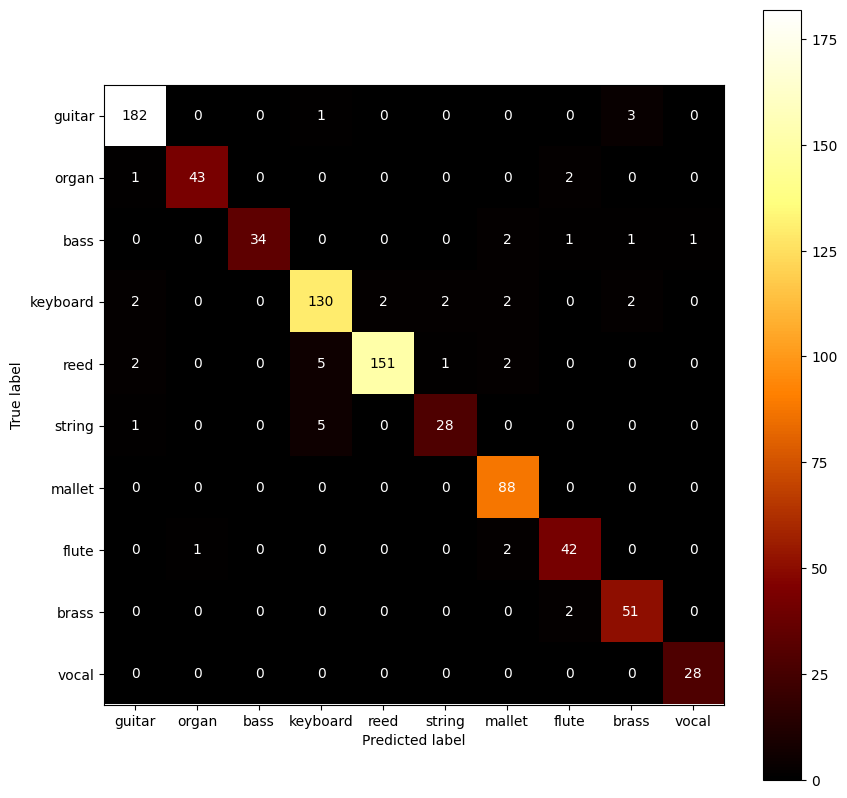

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix1 = confusion_matrix(y_test, predicted_classes)

ConfusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=class_list)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.plot(ax=ax, cmap="afmhot")
plt.show()

In [ ]:
f1_score(y_test, predicted_classes, average='macro')

0.9388207326914593